In [1]:
import numpy as np
import pandas as pd

def exp_smooth(d,extra_periods=1,alpha=0.4):
   
    # Setup input for the numpy array
    d = np.array(d) 
    # Historical sprint length
    cols = len(d) 
    # Append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods) 
    
    # Forecast array
    f = np.full(cols+extra_periods,np.nan) 
    # Initilization of first forecast
    f[1] = d[0]
    
    # Create all the t+1 forecast until end of historical sprints
    for t in range(2,cols+1):
        f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]
     
    # Forecast for all extra sprints
    for t in range(cols+1,cols+extra_periods):
        # Update the forecast as the previous forecast
        f[t] = f[t-1]
           
    df = pd.DataFrame.from_dict({"Historical":d,"Forecast":f,"Error":d-f})
  
    return df

MAE: 22.32
RMSE: 27.06


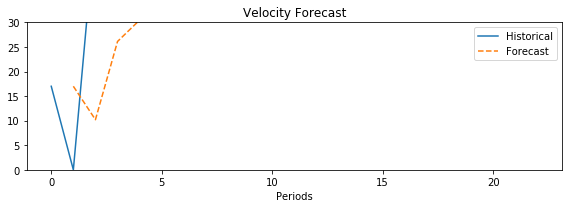

In [2]:
d=[17, 0, 50, 37, 54, 65, 59, 50, 39, 56, 85, 71, 112, 79, 126, 102, 135, 85, 152]   
df = exp_smooth(d,extra_periods=4)
df.index.name = "Periods"
df[["Historical","Forecast"]].plot(figsize=(8,3),title="Velocity Forecast",ylim=(0,30),style=["-","--"])  
MAE = df["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error"]**2).mean())
print("RMSE:",round(RMSE,2))
import matplotlib.pyplot as plt 
plt.tight_layout()
plt.savefig("fig-simple-exp-smooth-example"+".pdf")